In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
y=pd.read_csv("nanofluid_data.csv")
y

,Average particle diameter (nm),T (K),Volume Fraction,Volume fraction of Al2O3 (%),Mean k (W m?1 K?1),Standard deviation
0,8,299.1,0.0193,1.93,0.620,0.017
1,8,297.4,0.0299,2.99,0.621,0.008
2,8,297.7,0.0399,3.99,0.623,0.016
3,12,297.4,0.0200,2.00,0.622,0.006
4,12,297.4,0.0300,3.00,0.630,0.009
5,12,297.8,0.0400,4.00,0.640,0.005
6,16,296.8,0.0200,2.00,0.635,0.003
7,16,298.0,0.0300,3.00,0.642,0.015
8,16,298.3,0.0398,3.98,0.662,0.015
9,16,298.0,0.0200,2.00,0.637,0.017


In [3]:
import numpy as np
import pandas as pd

# Define ranges for each parameter
k_f_range = [0.5, 0.7]      # Thermal conductivity range for fluid (W/m·K)
k_p_range = [50, 400]       # Thermal conductivity range for particles (W/m·K)
alpha_range = [0.01, 0.10]  # Volume fraction range
n_values = [3, 6]           # Shape factors (spherical and elongated)

# Generate synthetic data
num_samples = 1000
synthetic_data = []

for _ in range(num_samples):
    k_f = np.random.uniform(*k_f_range)
    k_p = np.random.uniform(*k_p_range)
    alpha = np.random.uniform(*alpha_range)
    n = np.random.choice(n_values)
    
    # Calculate effective thermal conductivity using Hamilton-Crosser model
    k_eff = (k_p + (n - 1) * k_f - (n - 1) * alpha * (k_f - k_p)) / \
            (k_p + (n - 1) * k_f + alpha * (k_f - k_p))
    synthetic_data.append([k_f, k_p, alpha, n, k_eff * k_f])

# Create DataFrame for analysis or storage
df = pd.DataFrame(synthetic_data, columns=["k_f", "k_p", "alpha", "n", "k_eff"])


In [4]:
df


,k_f,k_p,alpha,n,k_eff
0,0.583918,263.796753,0.016531,3,0.613165
1,0.635745,291.330665,0.074508,6,0.938543
2,0.522620,261.479515,0.067307,6,0.746028
3,0.623458,121.571349,0.026329,6,0.721498
4,0.582824,382.857866,0.088581,3,0.751909
...,...,...,...,...,...
995,0.654764,322.585042,0.099821,3,0.871118
996,0.657369,59.481318,0.031480,6,0.777268
997,0.620978,232.076948,0.044679,3,0.707376
998,0.515964,274.170561,0.080284,6,0.782916


In [5]:
noise_factor = 0.02  # 2% noise
df["k_eff"] *= (1 + np.random.uniform(-noise_factor, noise_factor, num_samples))



In [6]:
df


,k_f,k_p,alpha,n,k_eff
0,0.583918,263.796753,0.016531,3,0.607567
1,0.635745,291.330665,0.074508,6,0.955164
2,0.522620,261.479515,0.067307,6,0.755778
3,0.623458,121.571349,0.026329,6,0.727315
4,0.582824,382.857866,0.088581,3,0.757298
...,...,...,...,...,...
995,0.654764,322.585042,0.099821,3,0.856831
996,0.657369,59.481318,0.031480,6,0.789141
997,0.620978,232.076948,0.044679,3,0.716418
998,0.515964,274.170561,0.080284,6,0.798113


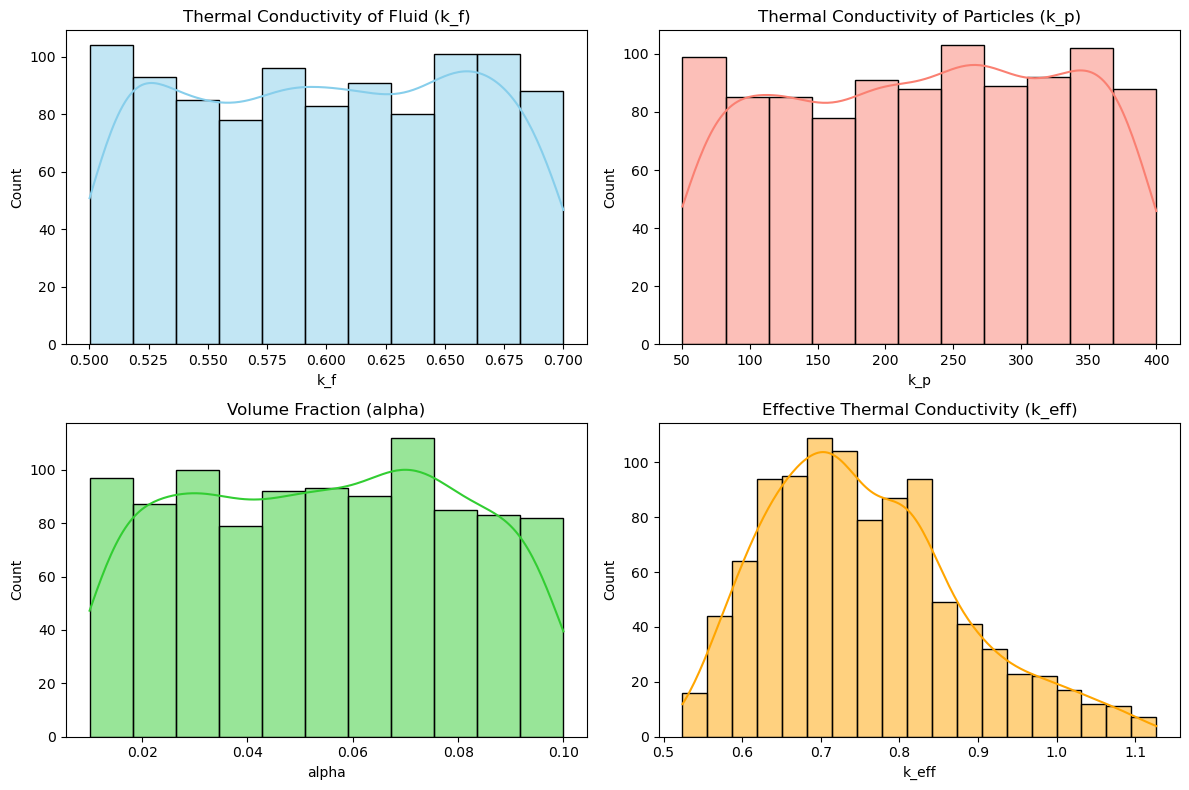

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of each parameter
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['k_f'], kde=True, color='skyblue').set(title='Thermal Conductivity of Fluid (k_f)')

plt.subplot(2, 2, 2)
sns.histplot(df['k_p'], kde=True, color='salmon').set(title='Thermal Conductivity of Particles (k_p)')

plt.subplot(2, 2, 3)
sns.histplot(df['alpha'], kde=True, color='limegreen').set(title='Volume Fraction (alpha)')

plt.subplot(2, 2, 4)
sns.histplot(df['k_eff'], kde=True, color='orange').set(title='Effective Thermal Conductivity (k_eff)')

plt.tight_layout()
plt.show()


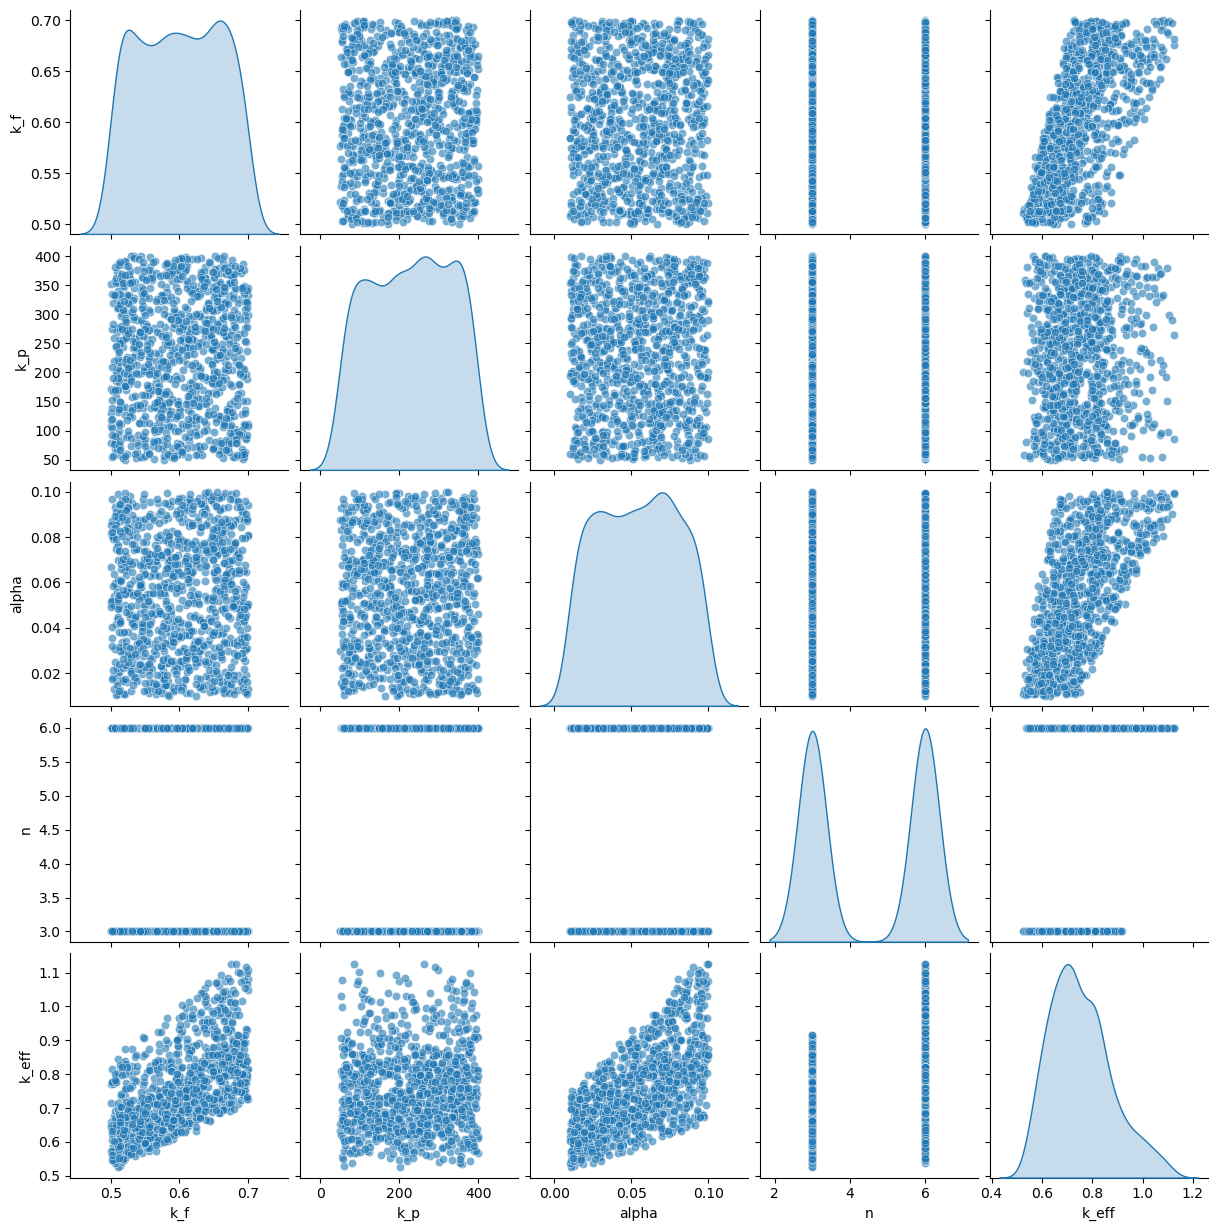

In [8]:
# Pair plot to see relationships between all variables
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()


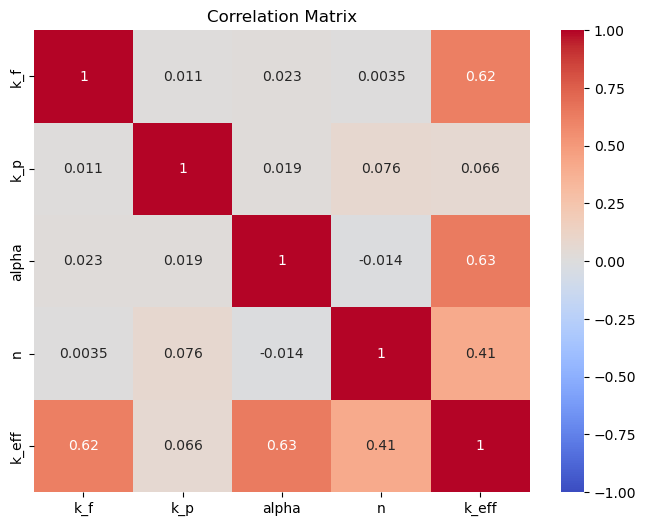

In [9]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


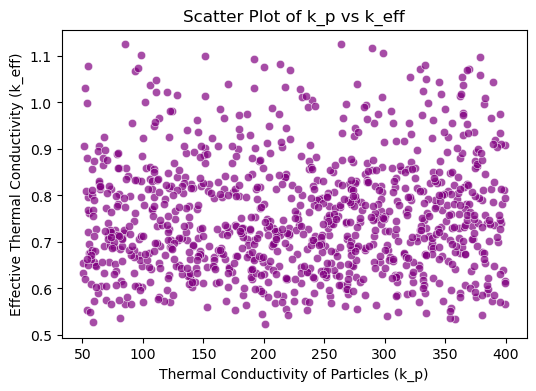

In [10]:
# Scatter plot for k_p (particle conductivity) vs. k_eff (effective conductivity)
plt.figure(figsize=(6, 4))
sns.scatterplot(x='k_p', y='k_eff', data=df, color='purple', alpha=0.7)
plt.title("Scatter Plot of k_p vs k_eff")
plt.xlabel("Thermal Conductivity of Particles (k_p)")
plt.ylabel("Effective Thermal Conductivity (k_eff)")
plt.show()


Mean Absolute Error: 0.010
R^2 Score: 0.989


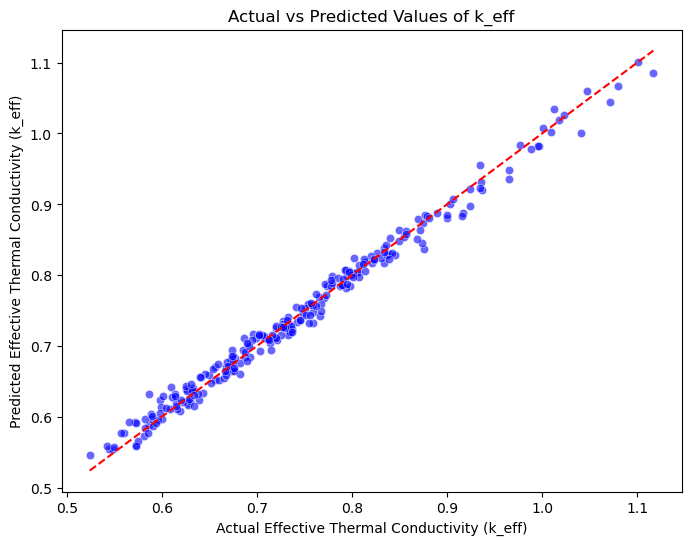

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load or generate synthetic data as shown in previous steps
# Here, we assume df is already prepared with synthetic data
# Example: df = pd.DataFrame(synthetic_data, columns=["k_f", "k_p", "alpha", "n", "k_eff"])

# Split the data into features (X) and target (y)
X = df[["k_f", "k_p", "alpha", "n"]]  # Features
y = df["k_eff"]  # Target variable (effective thermal conductivity)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R^2 Score: {r2:.3f}")

# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Effective Thermal Conductivity (k_eff)")
plt.ylabel("Predicted Effective Thermal Conductivity (k_eff)")
plt.title("Actual vs Predicted Values of k_eff")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for perfect predictions
plt.show(
)


In [12]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


Mean Absolute Error: 0.010
R^2 Score: 0.988


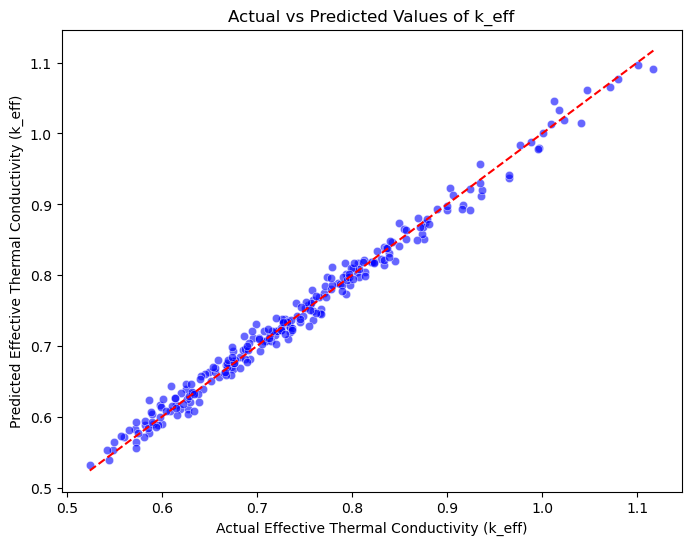

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

# Load or generate synthetic data as shown in previous steps
# Here, we assume df is already prepared with synthetic data
# Example: df = pd.DataFrame(synthetic_data, columns=["k_f", "k_p", "alpha", "n", "k_eff"])

# Split the data into features (X) and target (y)
X = df[["k_f", "k_p", "alpha", "n"]]  # Features
y = df["k_eff"]  # Target variable (effective thermal conductivity)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train the XGBRegressor model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R^2 Score: {r2:.3f}")

# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Effective Thermal Conductivity (k_eff)")
plt.ylabel("Predicted Effective Thermal Conductivity (k_eff)")
plt.title("Actual vs Predicted Values of k_eff")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for perfect predictions
plt.show()


In [14]:
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming y_test and y_pred are already defined:
# y_test is the actual values for the test set
# y_pred is the predicted values from the model

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.3f}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.3f}")


Mean Absolute Error (MAE): 0.010
R-squared (R²): 0.988


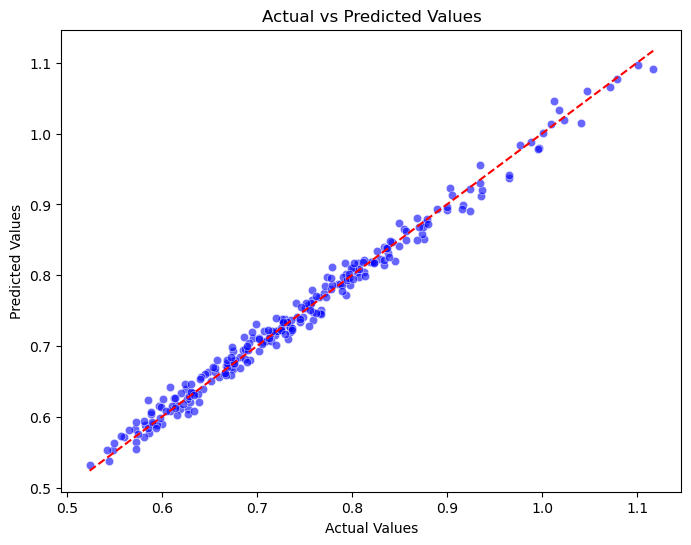

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for perfect predictions
plt.show()


Mean Absolute Error (MAE): 0.010
R-squared (R²): 0.988


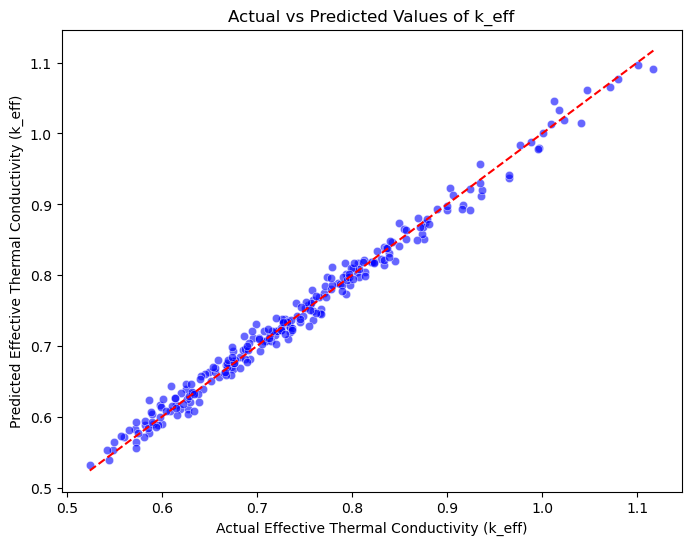

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

# Assuming synthetic data is loaded into a DataFrame 'df'
# Example:
# df = pd.DataFrame(synthetic_data, columns=["k_f", "k_p", "alpha", "n", "k_eff"])

# Split the data into features (X) and target (y)
X = df[["k_f", "k_p", "alpha", "n"]]  # Features
y = df["k_eff"]  # Target variable (effective thermal conductivity)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train the XGBRegressor model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.3f}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.3f}")

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Effective Thermal Conductivity (k_eff)")
plt.ylabel("Predicted Effective Thermal Conductivity (k_eff)")
plt.title("Actual vs Predicted Values of k_eff")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for perfect predictions
plt.show()
